Mean Reversion Strategy

In [11]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

1) Utilizando o ^BVSP para o teste#

In [3]:
#Baixando dados do ^BVSP
bovespa_data = yf.download("^BVSP", start="2018-01-01", end="2024-01-01")


if isinstance(bovespa_data.columns, pd.MultiIndex):
 bovespa_data.columns = ['_'.join(col).strip() for col in bovespa_data.columns]

#Bandas de bollinger
bovespa_data['SMA_20'] = bovespa_data['Close_^BVSP'].rolling(window=20).mean()
bovespa_data['Std_Dev'] = bovespa_data['Close_^BVSP'].rolling(window=20).std()
bovespa_data['Upper Band'] = bovespa_data['SMA_20'] + (2 * bovespa_data['Std_Dev'])
bovespa_data['Lower Band'] = bovespa_data['SMA_20'] - (2 * bovespa_data['Std_Dev'])

# Retirando valors NaN 
bovespa_data.dropna(subset=['Close_^BVSP', 'Lower Band', 'Upper Band'], inplace=True)

#Validando se o indice estpa consistente 
bovespa_data = bovespa_data.reset_index(drop=True)

#print(bovespa_data)

bovespa_data['Signal'] = 0

#Criando os Sinais de Compra e Venda
bovespa_data.loc[bovespa_data['Close_^BVSP'] < bovespa_data['Lower Band'], 'Signal'] = 1
bovespa_data.loc[bovespa_data['Close_^BVSP'] > bovespa_data['Upper Band'], 'Signal'] = -1

#Se o preço de fechamento (Close_^BVSP) 
#estiver abaixo da Banda Inferior, o código define Signal = 1 (indica um sinal de compra, esperando que o preço volte para a média).
#Se o preço estiver acima da Banda Superior, define Signal = -1 (sinal de venda, esperando que o preço caia de volta para a média).

#Evitando o Vies de Antecipação (Look-ahead Bias)
bovespa_data['Position'] = bovespa_data['Signal'].shift()
bovespa_data['Position'].dropna()

#O método .shift() desloca os sinais para frente, garantindo que as decisões sejam tomadas no dia seguinte, 
# evitando o look-ahead bias (uso de informações futuras que não estariam disponíveis no momento da decisão real).
#Sem o .shift(), o sistema pode estar operando com base em informações futuras, o que seria irrealista.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
1462    0.0
1463    0.0
1464    0.0
1465    0.0
1466    0.0
Name: Position, Length: 1466, dtype: float64

Mercado e estrategia de retornos

In [4]:
#retornos
bovespa_data['Market Return'] = bovespa_data['Close_^BVSP'].pct_change()
bovespa_data['Strategy Return'] = bovespa_data['Position']*bovespa_data['Market Return']
bovespa_data[['Market Return','Strategy Return']].dropna()

,Market Return,Strategy Return
1,0.005102,0.0
2,0.006854,0.0
3,-0.017007,-0.0
4,-0.025940,-0.0
5,0.024835,0.0
...,...,...
1462,0.010535,0.0
1463,0.004320,0.0
1464,0.005876,0.0
1465,0.004950,0.0


Acumulado Mercado e Estrategia

In [9]:
bovespa_data['Cumulative Market Return'] = (1 + bovespa_data['Market Return']).cumprod()
bovespa_data['Cumulative Strategy Return'] = (1 + bovespa_data['Strategy Return']).cumprod()
bovespa_data[['Cumulative Strategy Return','Cumulative Market Return']].dropna()


,Cumulative Strategy Return,Cumulative Market Return
1,1.000000,1.005102
2,1.000000,1.011991
3,1.000000,0.994780
4,1.000000,0.968976
5,1.000000,0.993040
...,...,...
1462,1.120788,1.564617
1463,1.120788,1.571376
1464,1.120788,1.580609
1465,1.120788,1.588433


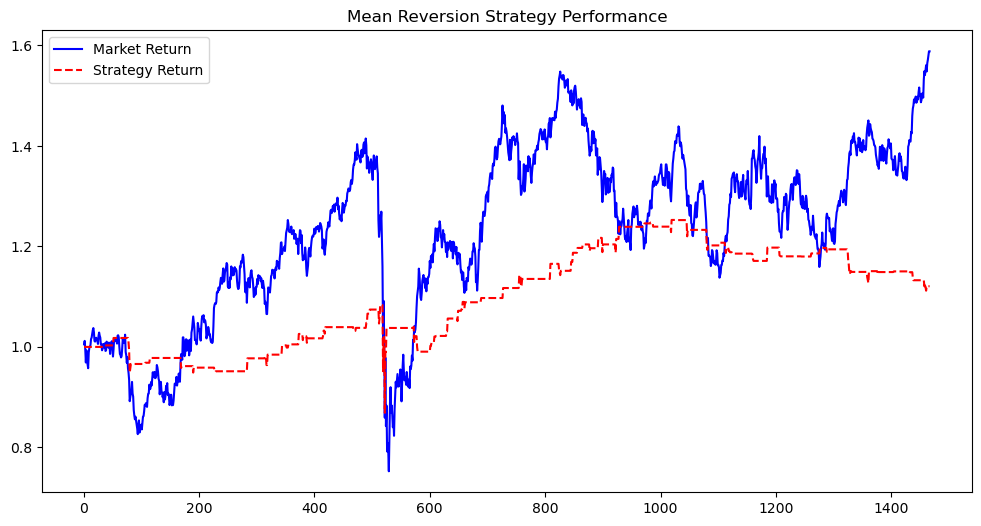

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(bovespa_data['Cumulative Market Return'], label="Market Return", linestyle='-', color='blue')
plt.plot(bovespa_data['Cumulative Strategy Return'], label="Strategy Return", linestyle='--', color='red')
plt.legend()
plt.title("Mean Reversion Strategy Performance")
plt.show()